findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


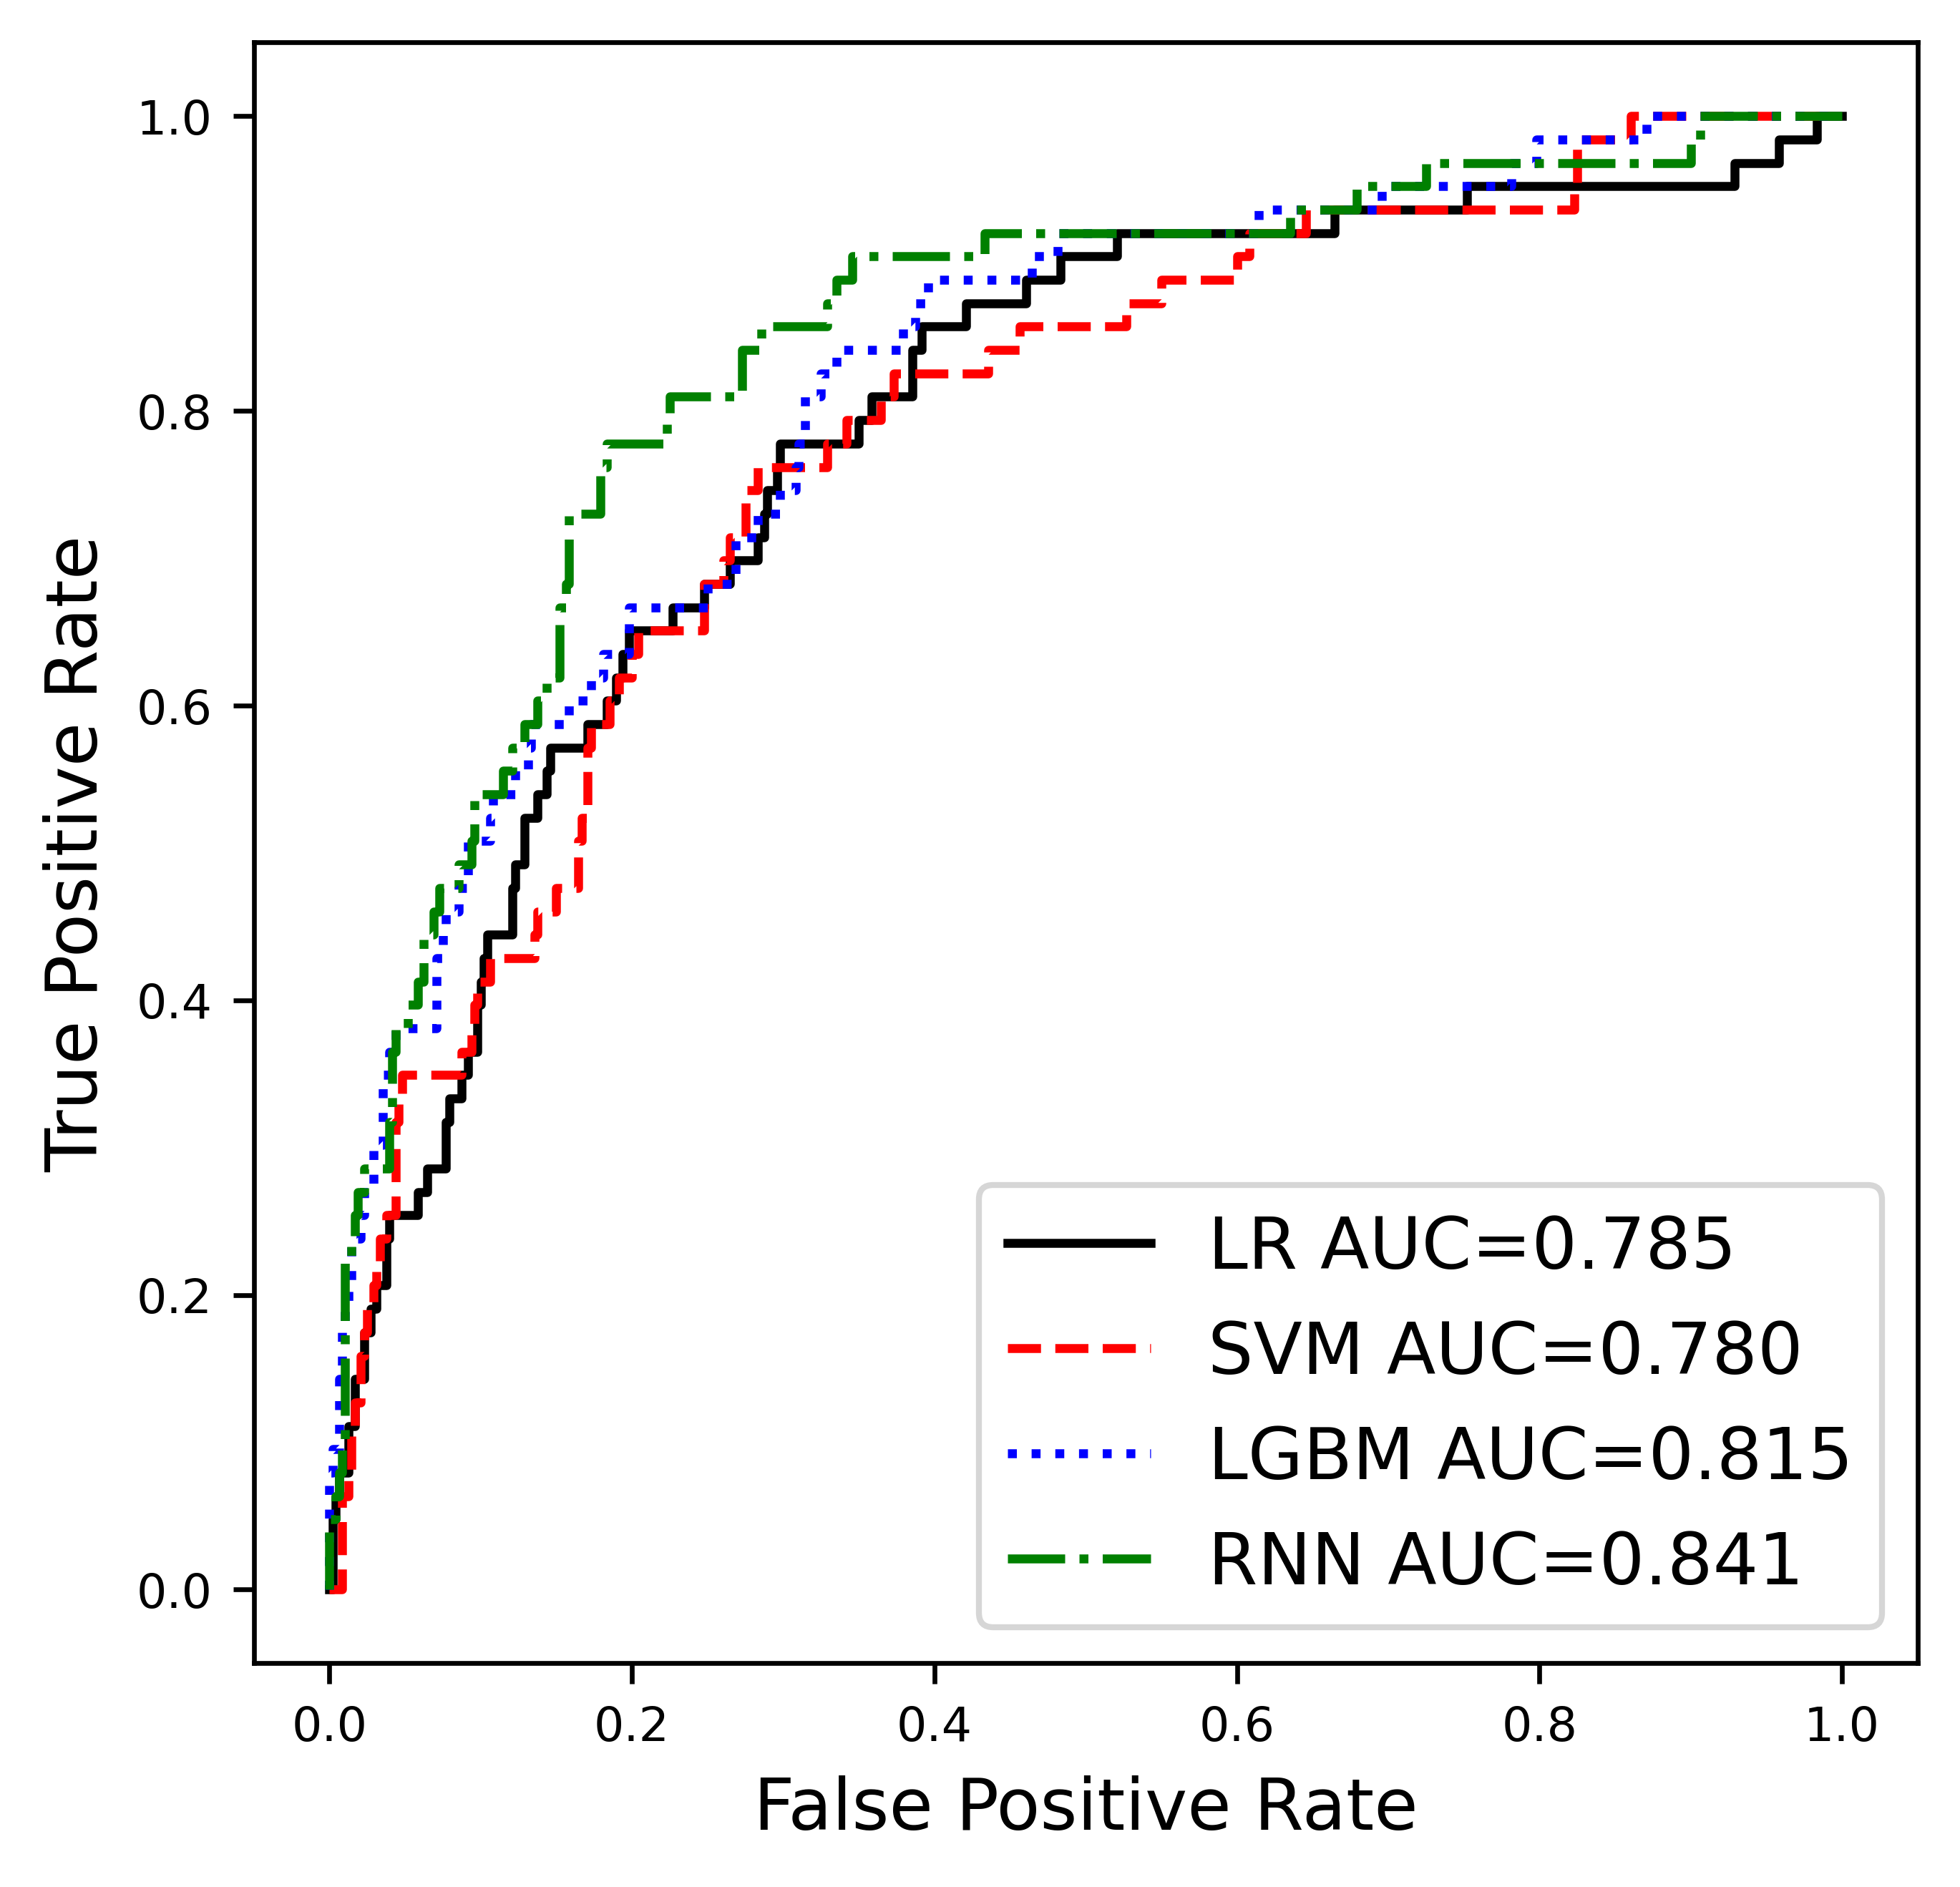

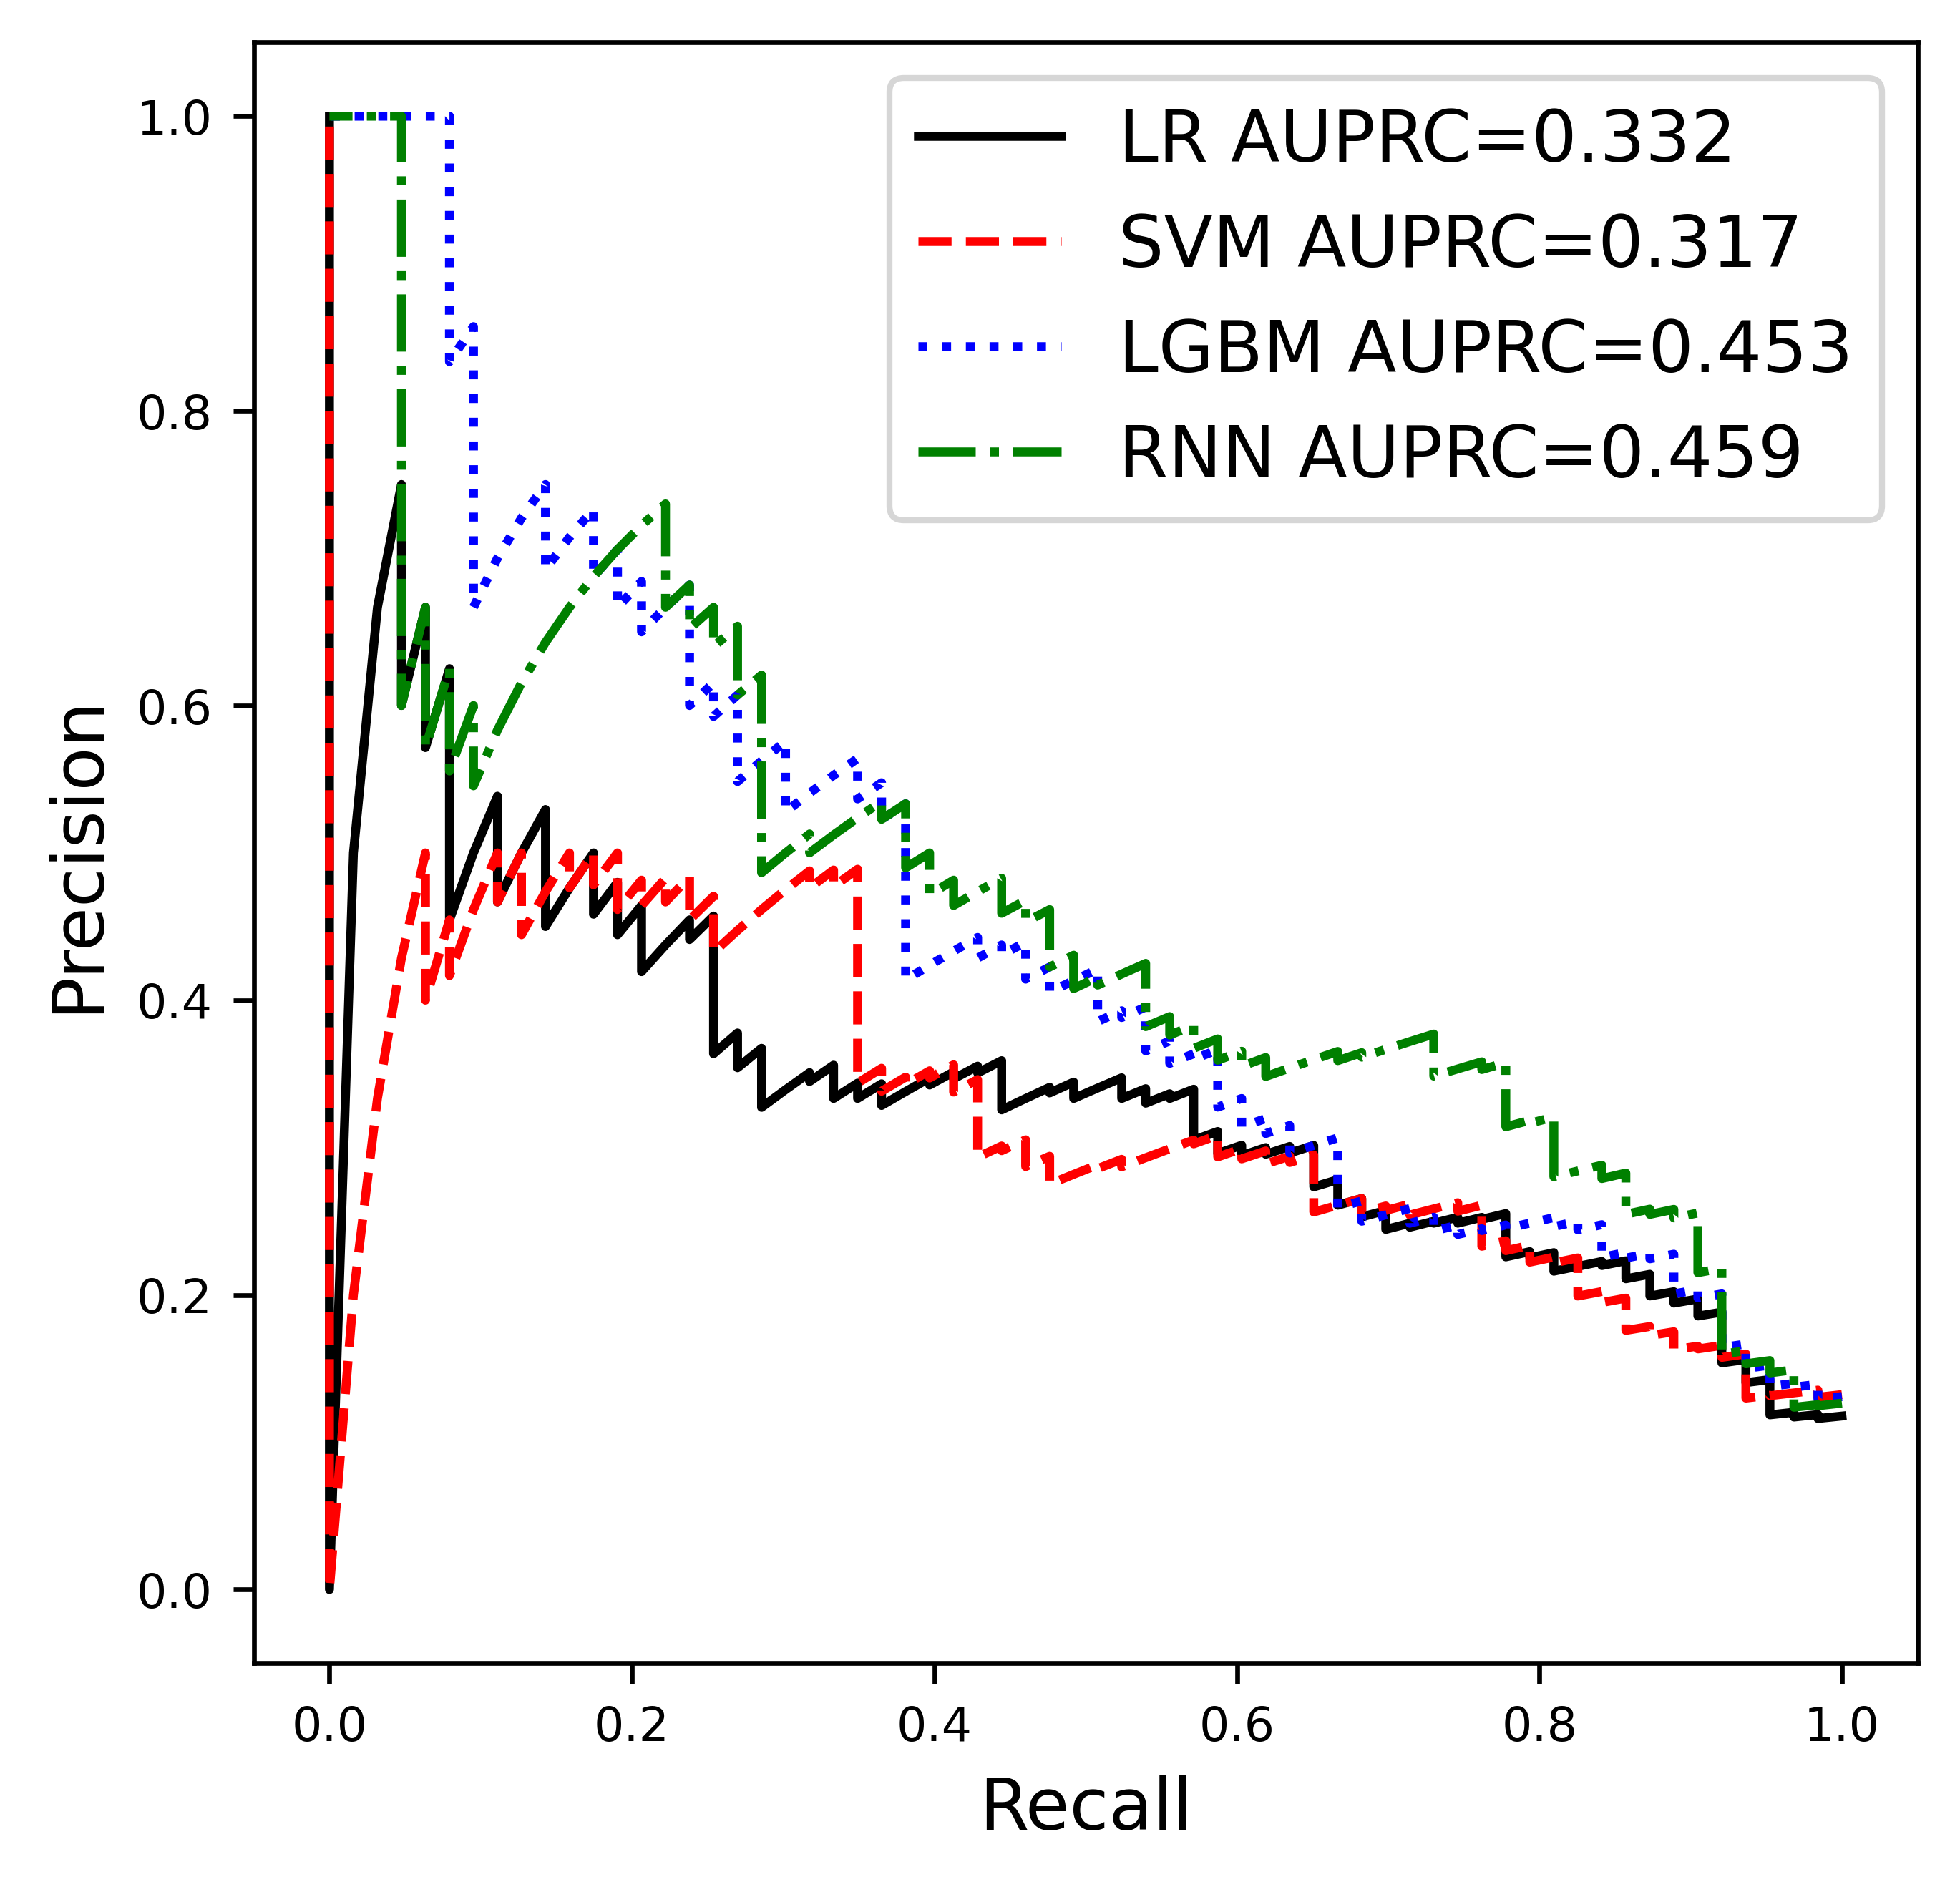

In [1]:
from Python.utils import plot_roc, plot_prc

plot_roc(
    figname="output/auc_compare.png", 
    style='ieee', 
    LR="output/LR_roc.csv", 
    SVM="output/SVM_roc.csv",
    LGBM="output/LightGBM_roc.csv", 
    RNN="output/RNN_roc.csv"
)

plot_prc(
    figname="output/auprc_compare.png", 
    style='ieee', 
    LR="output/LR_prc.csv", 
    SVM="output/SVM_prc.csv",
    LGBM="output/LightGBM_prc.csv", 
    RNN="output/RNN_prc.csv"
)

In [2]:
from tableone import TableOne
from Python.model_data import race_recode
import pandas as pd
case_labs = pd.read_csv('Data/case_48h_labs_ex3h.csv')
case_vitals = pd.read_csv('Data/case_48h_vitals_ex3h.csv')
case_static = pd.read_csv('Data/static_variables_cases_ex3h.csv')

control_labs = pd.read_csv('Data/control_48h_labs_ex3h.csv')
control_vitals = pd.read_csv('Data/control_48h_vitals_ex3h.csv')
control_static = pd.read_csv('Data/static_variables_controls_ex3h.csv')

t1_case = case_static.sort_values(['icustay_id', 'admission_age'])[['gender', 'ethnicity', 'admission_age', 'icustay_id']]
t1_case = t1_case[t1_case.icustay_id.isin(case_vitals.icustay_id) & t1_case.icustay_id.isin(case_labs.icustay_id)]
t1_case.loc[:, 'gender'] = t1_case['gender'].apply(lambda x: 'Female' if x == 'F' else 'Male')
t1_case = race_recode(t1_case)
t1_case['Sepsis'] = 'Yes'

t1_control = control_static.sort_values(['icustay_id', 'admission_age'])[['gender', 'ethnicity', 'admission_age', 'icustay_id']]
t1_control = t1_control[t1_control.icustay_id.isin(control_vitals.icustay_id) & t1_control.icustay_id.isin(control_labs.icustay_id)]

t1_control.loc[:, 'gender'] = t1_control['gender'].apply(lambda x: 'Female' if x == 'F' else 'Male')
t1_control = race_recode(t1_control)
t1_control['Sepsis'] = 'No'

t1 = pd.concat((t1_case, t1_control), ignore_index=True)

order = {
    'ethnicity': ['White', 'Black', 'Hispanic', 'Asian', 'Other']
}

label = {
    'admission_age': 'Age (yrs) at first admission',
    'ethnicity': 'Race/Ethnicity',
    'gender': 'Gender',
}

t1_pivot = TableOne(
    t1, 
    columns=['gender', 'ethnicity', 'admission_age'], 
    categorical=['gender', 'ethnicity'],
    nonnormal = ['admission_age'],  
    groupby = 'Sepsis', 
    limit = 6, 
    order = order,
    pval = True,
    missing = False,
    rename = label)


In [3]:
t1_pivot

Grouped by Sepsis                                            
                                                                Overall                No               Yes P-Value
n                                                                  5428              4798               630        
Gender, n (%)                                Female         2393 (44.1)       2094 (43.6)        299 (47.5)   0.076
                                             Male           3035 (55.9)       2704 (56.4)        331 (52.5)        
Race/Ethnicity, n (%)                        White          4005 (73.8)       3554 (74.1)        451 (71.6)   0.341
                                             Black           545 (10.0)         476 (9.9)         69 (11.0)        
                                             Hispanic         202 (3.7)         172 (3.6)          30 (4.8)        
                                             Asian            144 (2.7)         123 (2.6)          21 (3.3)        
                                             Other            532 (9.8)         473 (9.9)          59 (9.4)        
Age (yrs) at first admission, median [Q1,Q3]           65.9 [53.5,77.3]  66.0 [53.6,77.3]  65.2 [52.7,76.6]   0.509

In [4]:
print(t1_pivot.to_latex(index=False))

\begin{tabular}{llll}
\toprule
Grouped by Sepsis &                   \\
          Overall &                No &               Yes & P-Value \\
\midrule
             5428 &              4798 &               630 &         \\
      2393 (44.1) &       2094 (43.6) &        299 (47.5) &   0.076 \\
      3035 (55.9) &       2704 (56.4) &        331 (52.5) &         \\
      4005 (73.8) &       3554 (74.1) &        451 (71.6) &   0.341 \\
       545 (10.0) &         476 (9.9) &         69 (11.0) &         \\
        202 (3.7) &         172 (3.6) &          30 (4.8) &         \\
        144 (2.7) &         123 (2.6) &          21 (3.3) &         \\
        532 (9.8) &         473 (9.9) &          59 (9.4) &         \\
 65.9 [53.5,77.3] &  66.0 [53.6,77.3] &  65.2 [52.7,76.6] &   0.509 \\
\bottomrule
\end{tabular}

